In [257]:
# Libraries required to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [258]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

# Reading and Understanding the Data

In [260]:
df=pd.read_csv('day.csv')

In [261]:
print('day.csv file contains',df.shape)

day.csv file contains (730, 16)


## 1. DATA CLEANING

### 1.1 Row cleaning

**Delete summary rows: Total, Subtotal rows**<br/>
**Delete incorrect rows: Header rows, Footer rows**

In [265]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [266]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


<span style="color:blue">From the head and tail commands we  can observe that there are no total, sub_total, header and footer rows</span>

## 1.2 Column cleaning

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [270]:
# check percentage of null values in columns
(df.isna().sum()/len(df))*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<span style="color:blue">We observed that there are no null columns</span>

In [272]:
# 1. Drop the instant column as it acts like a idex which is not useful in analysis
# 2. Drop the dteday column as yr and mnth columns are already present
df.drop(['instant', 'dteday'], axis=1, inplace=True)

In [273]:
print('Shape of the dataframe after dropping the instant and dteday columns',df.shape)

Shape of the dataframe after dropping the instant and dteday columns (730, 14)


In [274]:
# 1. Drop the columns casual and registered as they are not features
# 2. Also cnt is a target variable which is the sum of casual and registered
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [275]:
print('Shape of the dataframe after dropping the casual and registered columns',df.shape)

Shape of the dataframe after dropping the casual and registered columns (730, 12)


In [276]:
print('Total no.of duplicate rows', len(df[df.duplicated()]))

Total no.of duplicate rows 0


In [277]:
# From data dictionary we observed that the categorical variables mentioned as numerical variables
# 1. season 2. weathersit 3.mnth
# Convert them to category type
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [278]:
df['season'].replace({
    1:"spring",
    2:"summer",
    3:"fall",
    4:"winter"
}, inplace=True)

df['weathersit'].replace({
  1: "clear_weather",
  2: "misty_weather",
  3: "light_precipitation",
  4: "severe_weather"
}, inplace=True)

df['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace=True)

df['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace=True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty_weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty_weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear_weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear_weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear_weather,9.305237,11.46350,43.6957,12.522300,1600


## 2. Exploratory Data Analysis

### 2.1 UNIVARIATE ANALYSIS

#### Visualizing numerical variables

#### 2.1.1 Box plot of numeric variables to observe outliers

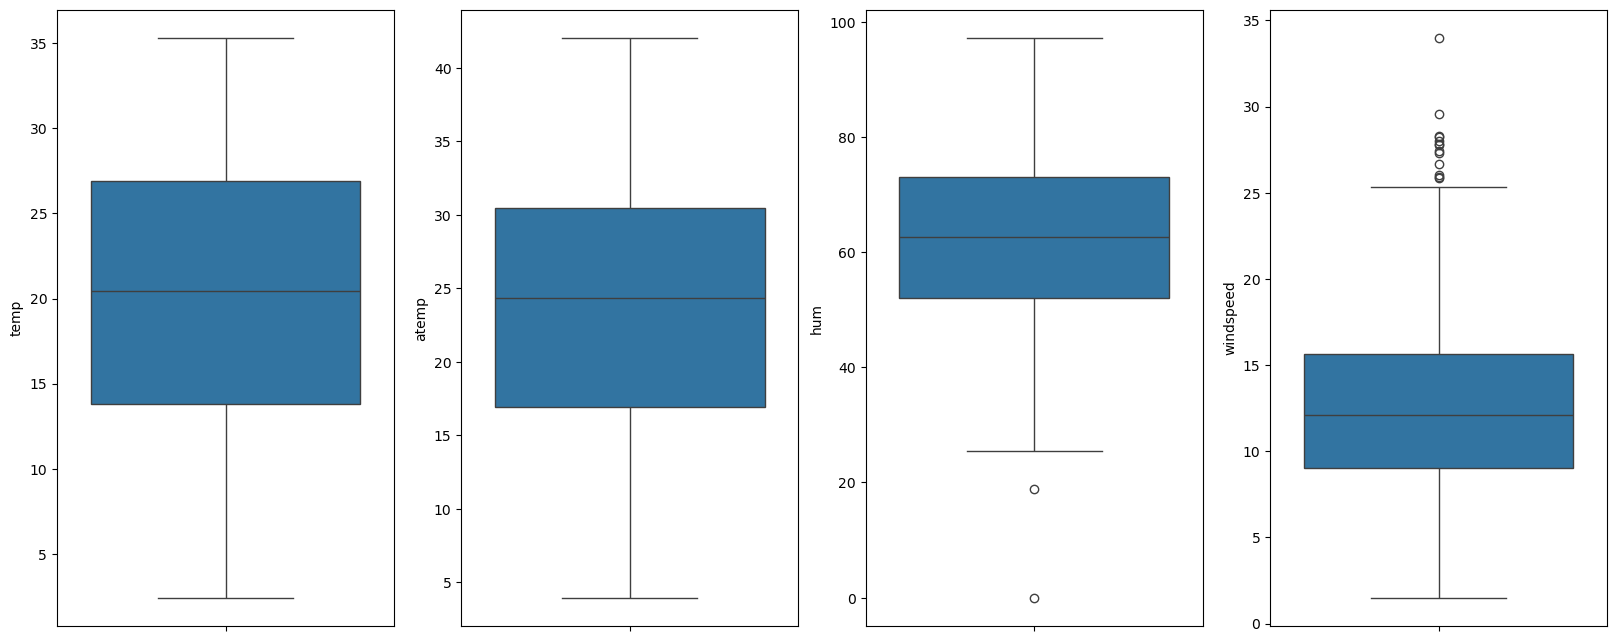

In [283]:
# Visualizing numerical variables
# 1.temp 2.atemp 3.hum 4.windspeed
plt.figure(figsize=(20, 8))
plt.subplot(1,4,1)
sns.boxplot(y='temp', data=df)
plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=df)
plt.subplot(1,4,3)
sns.boxplot(y='hum', data=df)
plt.subplot(1,4,4)
sns.boxplot(y='windspeed', data=df)

plt.show()

<span style="color:green">Inference: </br> 
1. For numerical variables there are no considerable amount of outliers </br>
</span>

#### 2.1.2 Line graph of cnt along month and year

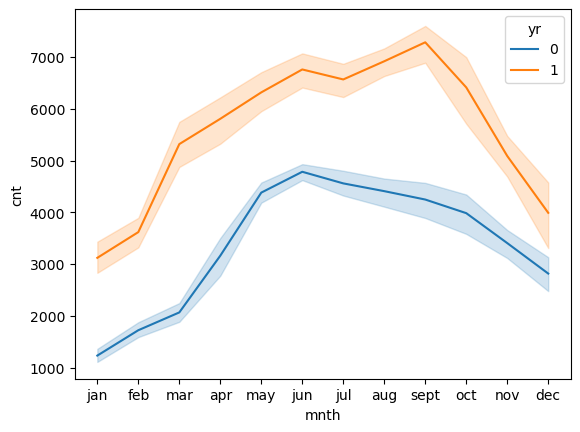

In [286]:
sns.lineplot(data=df, x='mnth', y='cnt', hue='yr')
plt.show()

<span style="color:green">Inferences: </br> 
1. For both years, rental bike counts are increasing in middle of the year from may to october(Demand is high) </br>
2. For both years, both starting and end of the year counts are decresing(Demand is low)
</span>

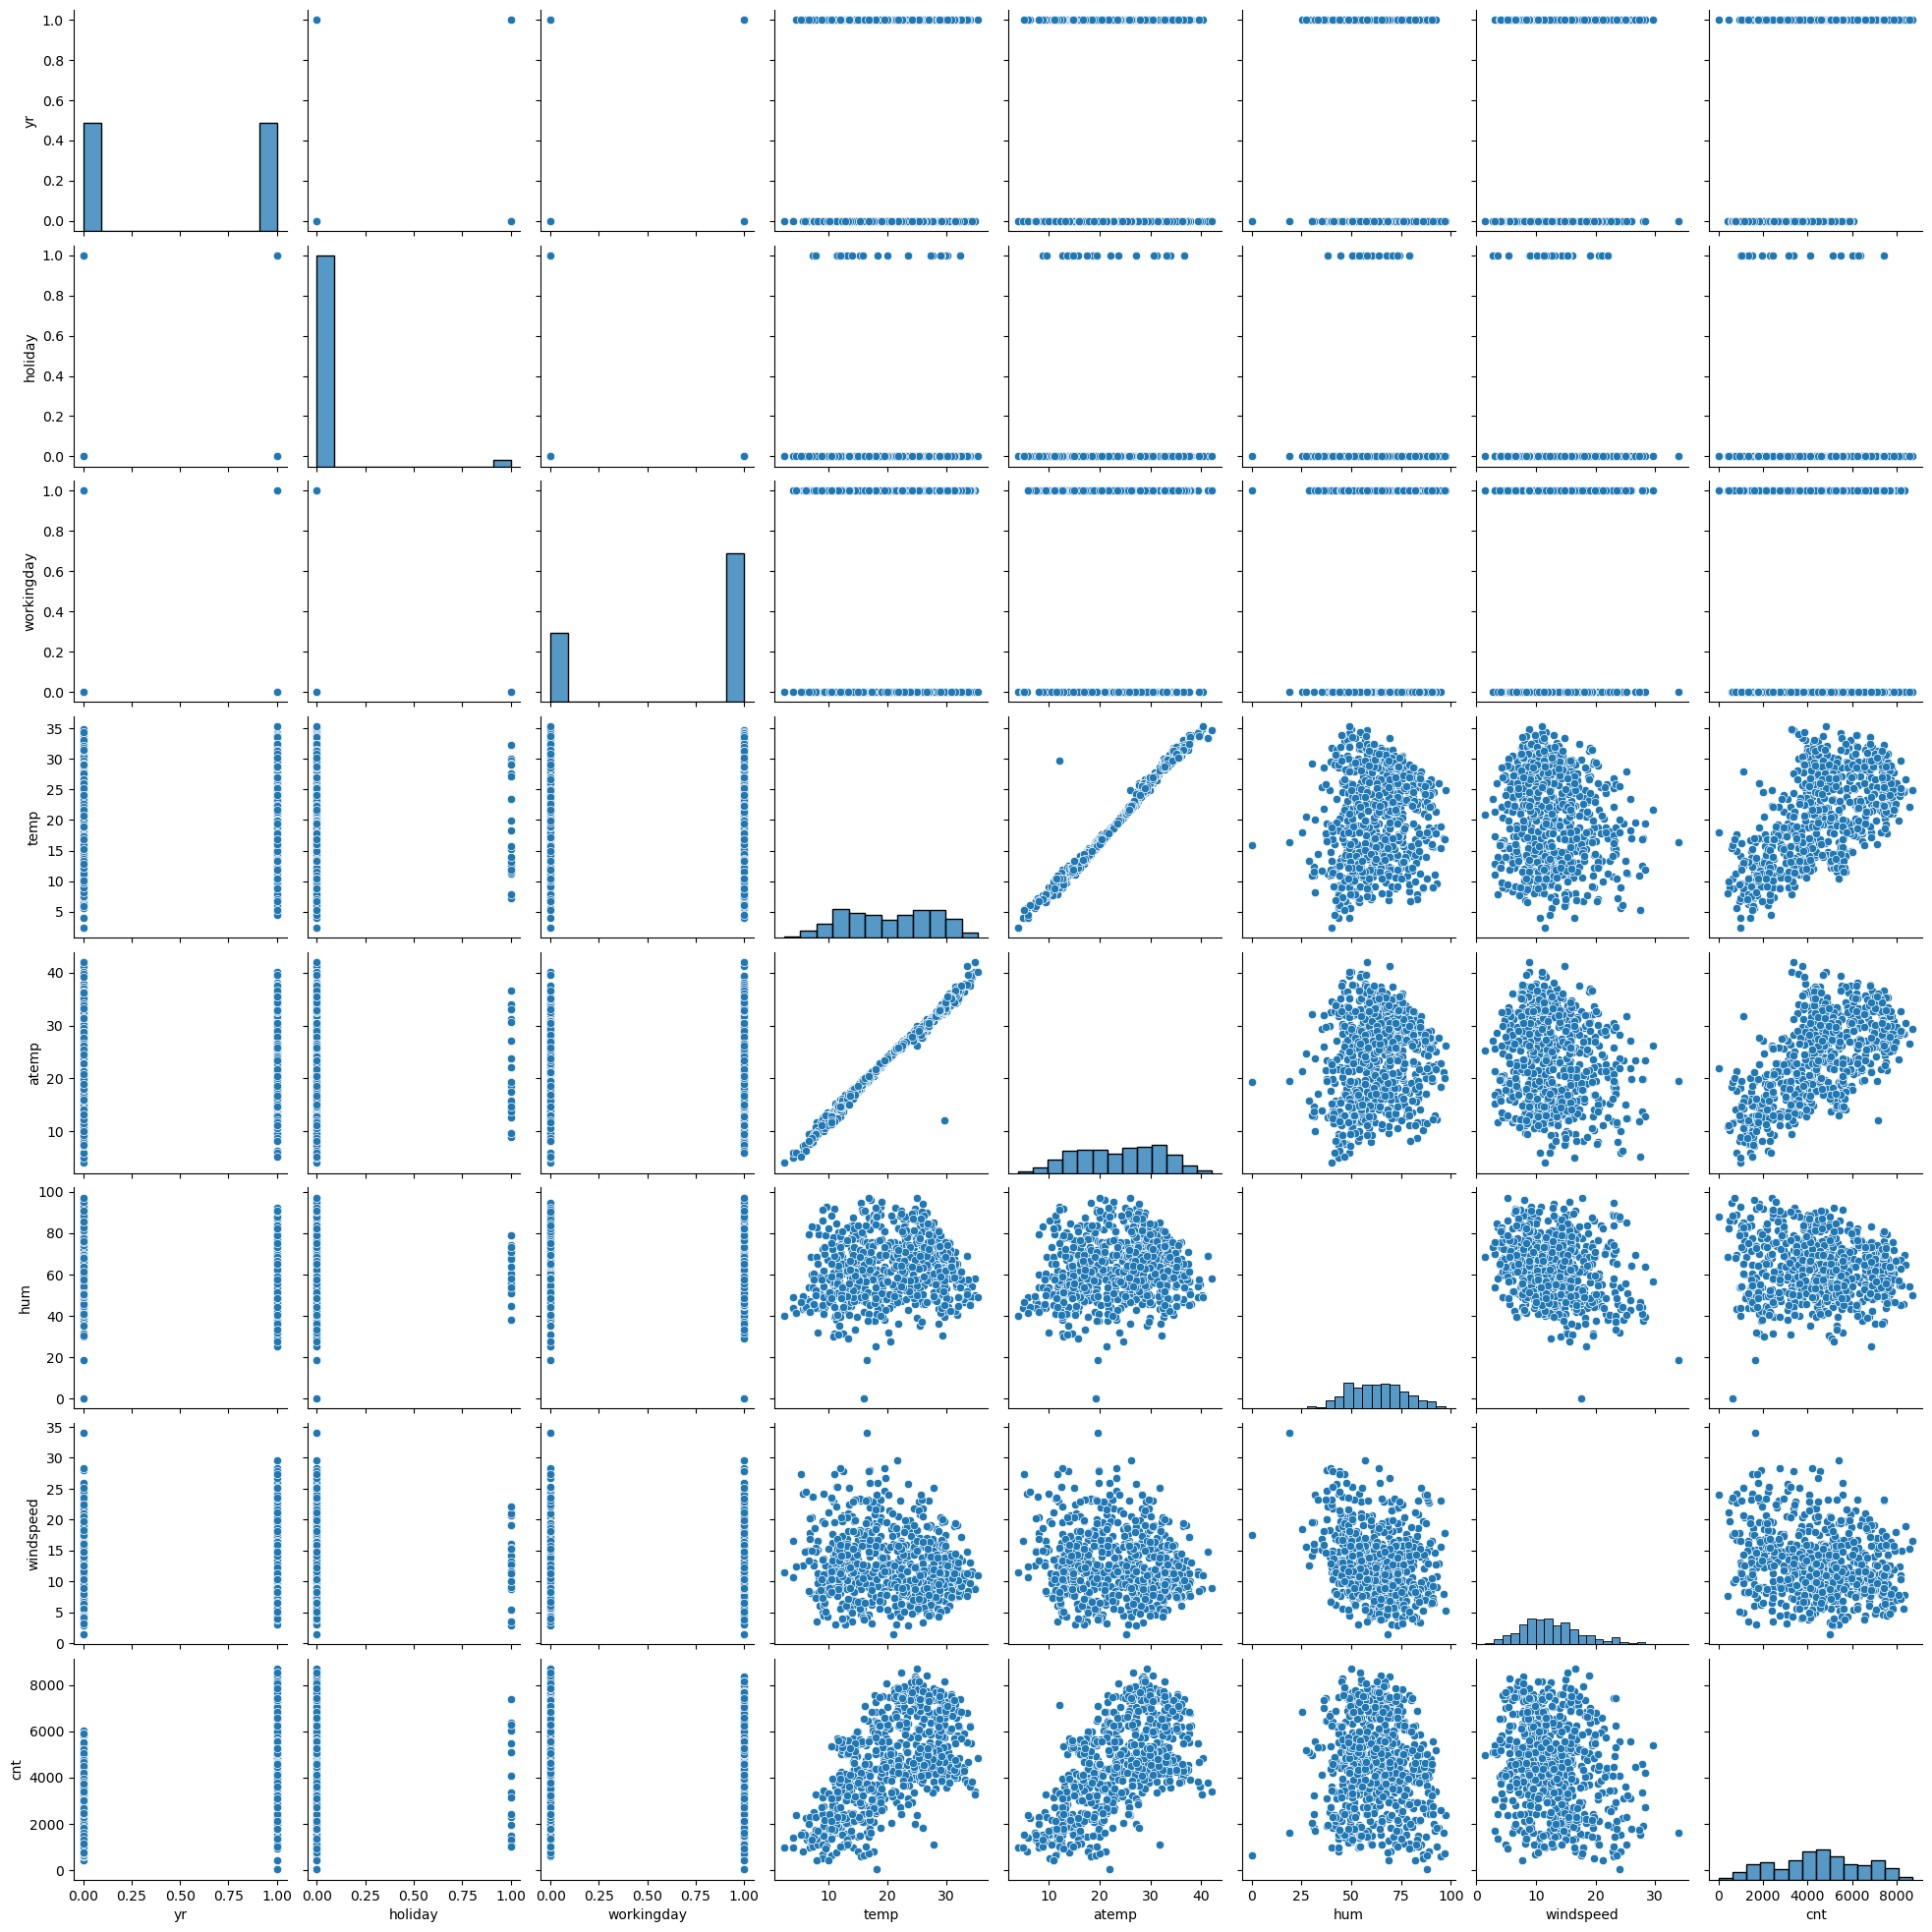

In [288]:
sns.pairplot(df)
plt.show()

<span style="color:green">Inferences: </br> 
1. temp,atemp and cnt are having  linear dependency </br>
</span>

### 2.2 BIVARIATE ANALYSIS

In [292]:
def plot_bar_graphs_vs_cnt(feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(data=df, x=feature, y='cnt', palette='Set2')
    plt.title(f'{feature} vs cnt')
    
    plt.subplot(1,2,2)
    sns.barplot(data=df, x=feature, y='cnt', palette='Set2', hue='yr')
    plt.title(f'{feature} vs cnt(2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])

    plt.tight_layout()
    plt.show()

#### 2.2.1 Bar graph of season vs cnt

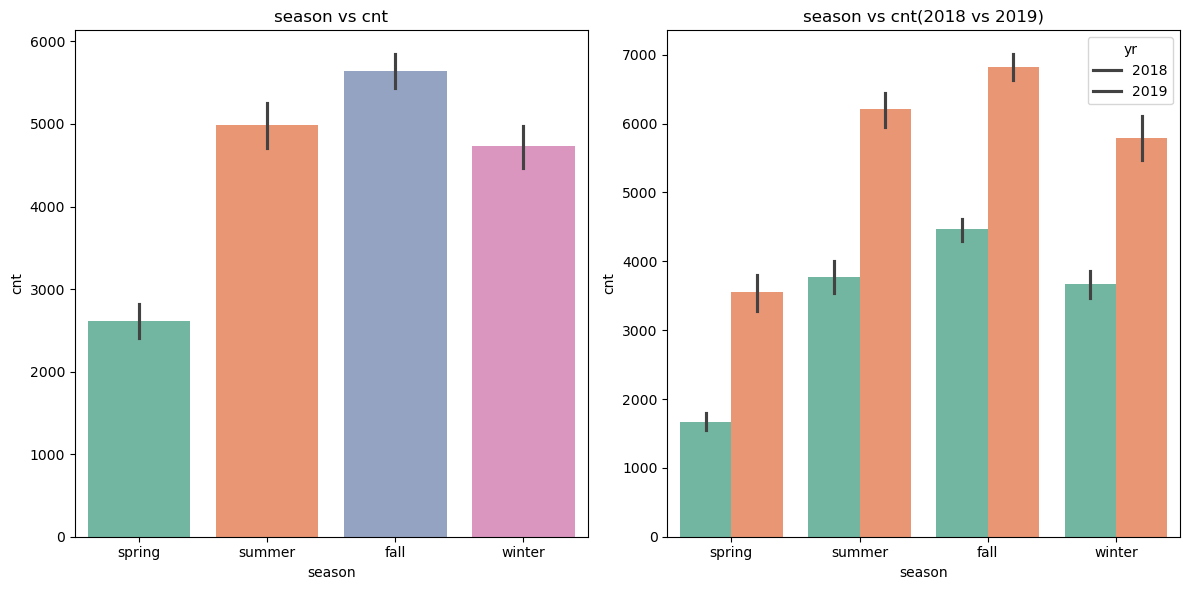

In [294]:
plot_bar_graphs_vs_cnt('season')

<span style="color:green">Inferences: </br> 
1. Fall season has highest rentals follwed by summer </br>
2. Rentals are increased drastically for every season in 2019 compared to 2018
</span>

#### 2.2.2 Bar graph of months vs cnt

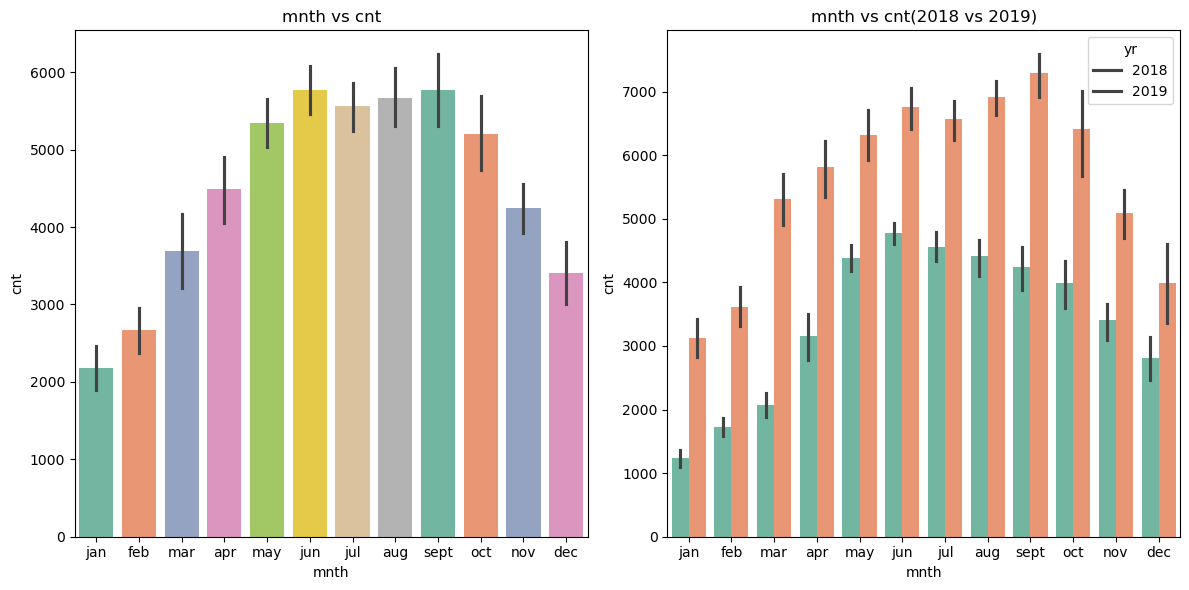

In [297]:
plot_bar_graphs_vs_cnt('mnth')

<span style="color:green">Inferences: </br> 
1. Rentals follow a increasing pattern from January  to June  </br>
2. From June to September almost has equal number of rentals and then decreased from october
2. Rentals are increased drastically for every month in 2019 compared to 2018
</span>

#### 2.2.3 Bar graph of holiday vs cnt

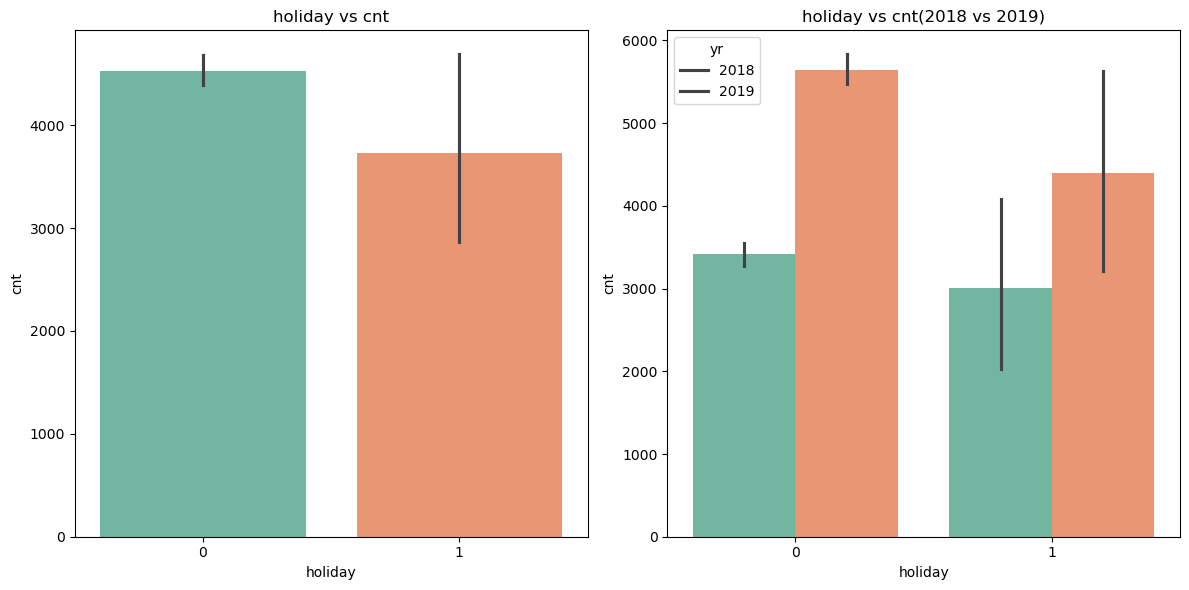

In [300]:
plot_bar_graphs_vs_cnt('holiday')

<span style="color:green">Inferences: </br> 
1. Rentals on non-holidays are more than holidays  </br>
2. Rentals are increased drastically for holiday and non-holiday in 2019 compared to 2018
</span>

#### 2.2.4 Bar graph of weekday vs cnt

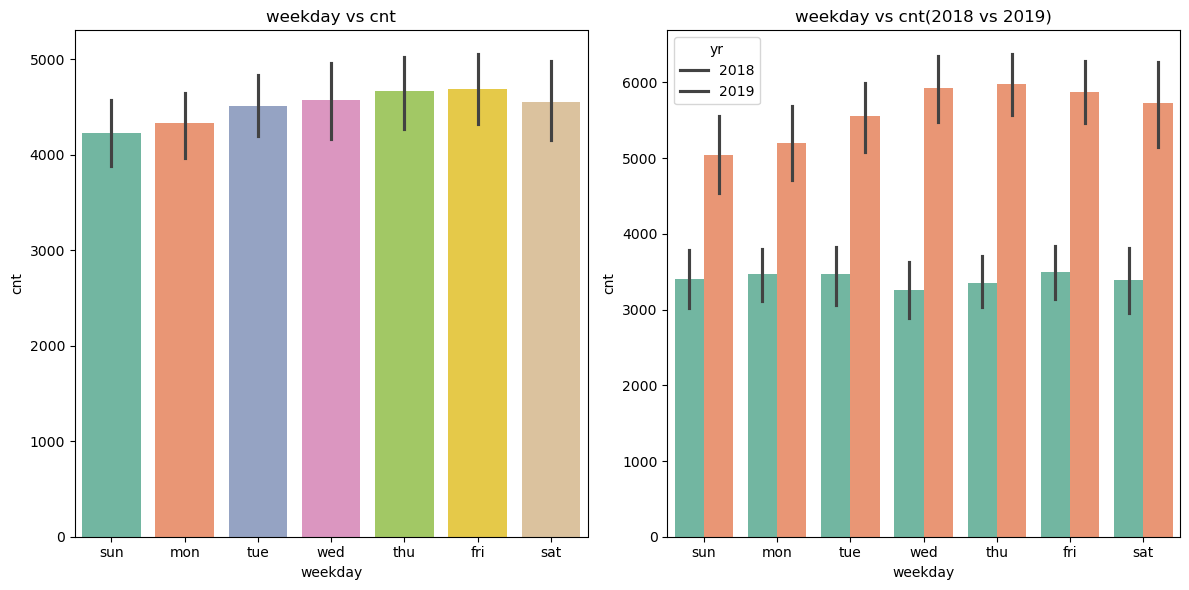

In [303]:
plot_bar_graphs_vs_cnt('weekday')

<span style="color:green">Inferences: </br> 
1. Rentals are more on Thurday's and Friday's </br>
2. Rentals are increased drastically for weekday in 2019 compared to 2018
</span>

#### 2.2.5 Bar graph of workingday vs cnt

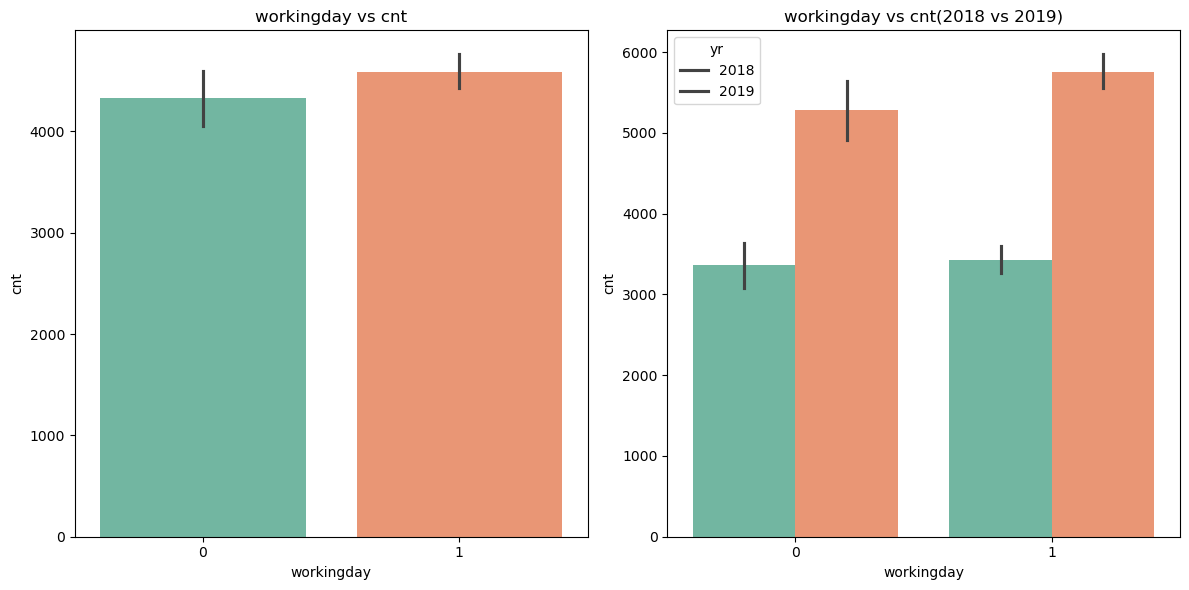

In [306]:
plot_bar_graphs_vs_cnt('workingday')

<span style="color:green">Inferences: </br> 
1. Rentals are more on working day </br>
2. Rentals are increased drastically for working day in 2019 compared to 2018
</span>

#### 2.2.5 Bar graph of weathersit vs cnt

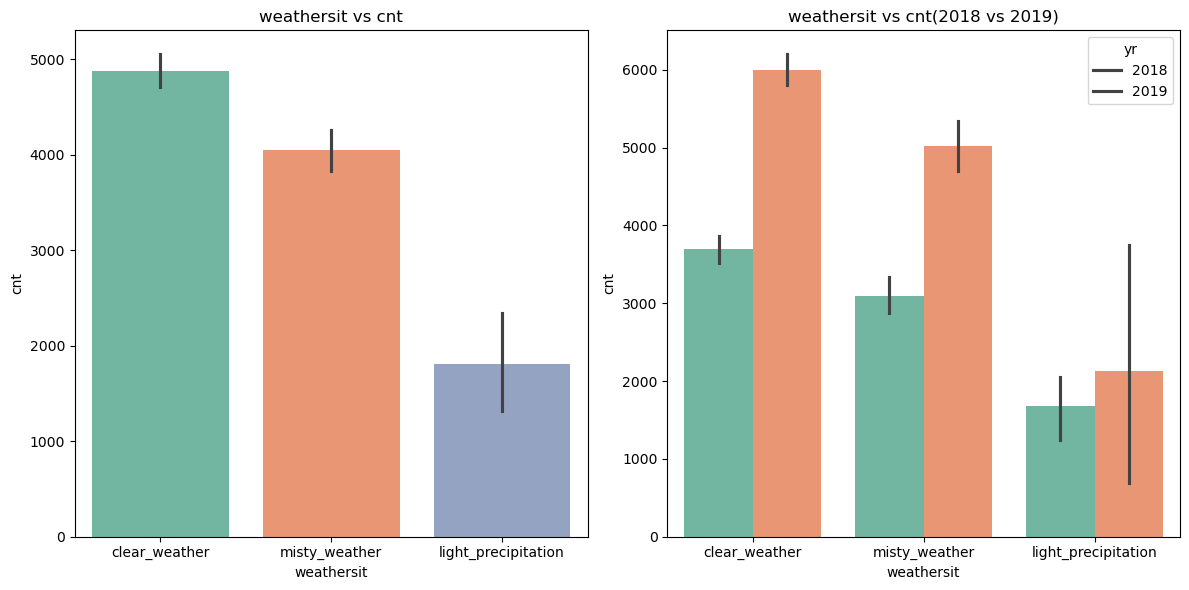

In [309]:
plot_bar_graphs_vs_cnt('weathersit')

<span style="color:green">Inferences: </br> 
1. Rentals are more on clear weather days </br>
2. Rentals are increased drastically for every type of weather in 2019 compared to 2018
</span>

# 2.3 HEAT MAP

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


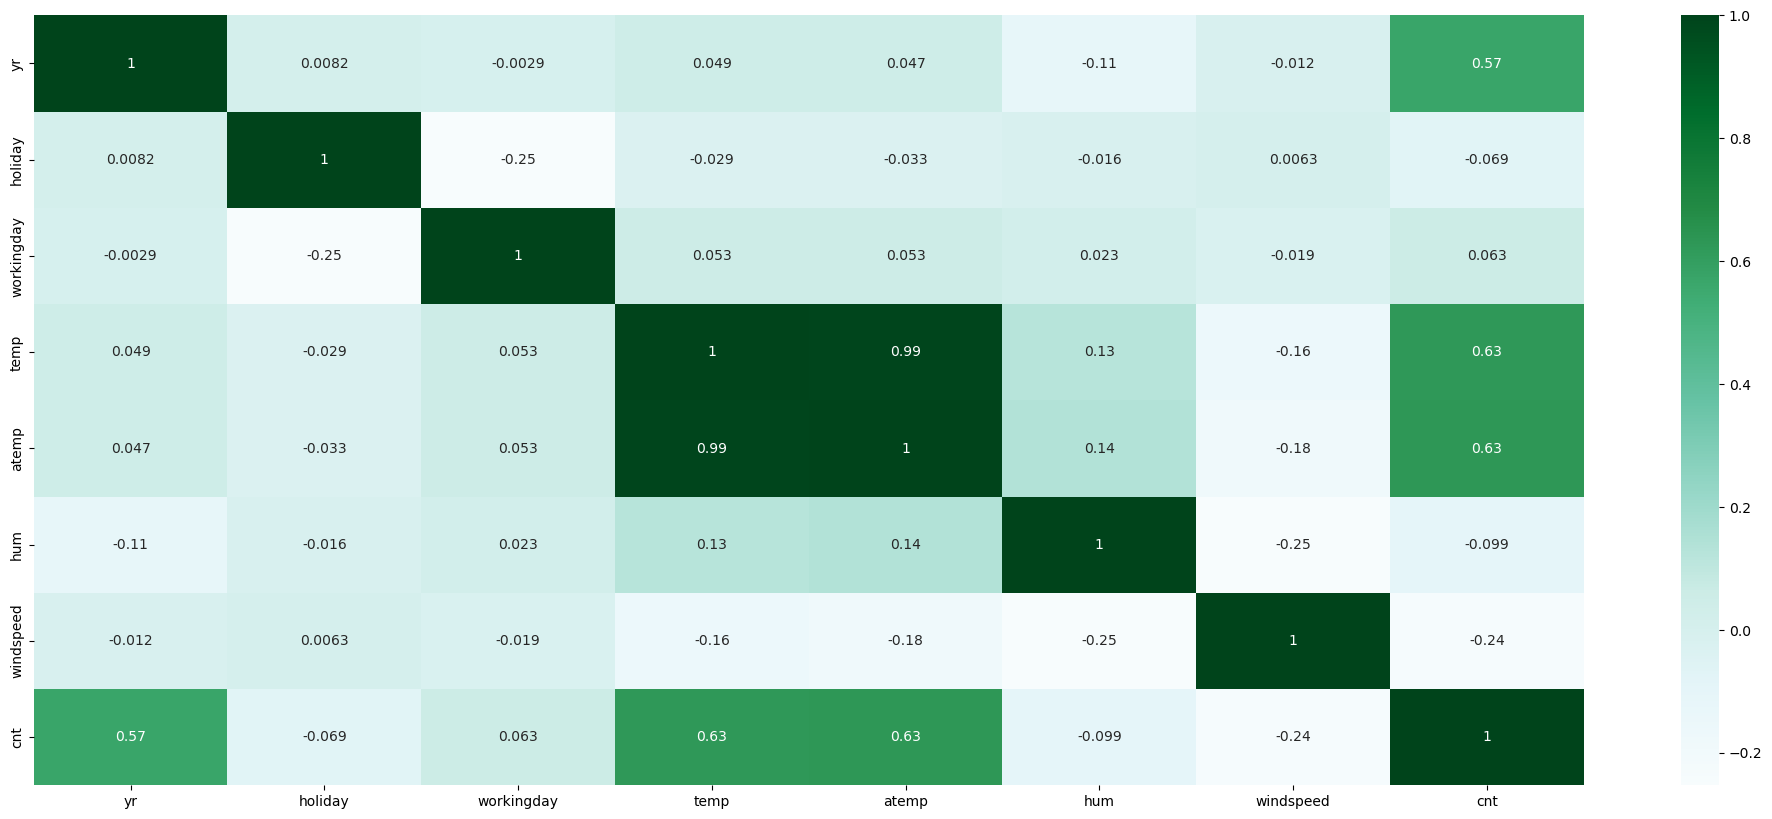

In [327]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix, annot = True, cmap='BuGn')
plt.show()

<span style="color:green">Inferences: </br> 
1. Independent variables windspeed, hum and holiday are negatively correlated with target cnt </br>
2. Independent variables temp and atemp are strongly corelated with other
</span>